In [1]:
import pandas as pd


In [3]:
train_df = pd.read_csv("train.csv")
print(train_df.shape)

test_df = pd.read_csv("test.csv")
print(test_df.shape)

(42000, 785)
(28000, 784)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, 1:], train_df.iloc[:, 0], test_size=0.2, random_state=42)
 

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [6]:

import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


2023-08-14 23:28:33.565689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-14 23:28:33.692720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-14 23:28:33.692876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-14 23:28:33.693790: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/10
 116/1050 [==>...........................] - ETA: 0s - loss: 10.4769 - accuracy: 0.7392 

2023-08-14 23:28:34.333937: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1050/1050 [==============================] - 2s 1ms/step - loss: 2.3113 - accuracy: 0.8673 - val_loss: 0.4451 - val_accuracy: 0.9075
Epoch 2/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3312 - accuracy: 0.9264 - val_loss: 0.3428 - val_accuracy: 0.9210
Epoch 3/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2213 - accuracy: 0.9453 - val_loss: 0.2698 - val_accuracy: 0.9354
Epoch 4/10
1050/1050 [==============================] - 1s 994us/step - loss: 0.1879 - accuracy: 0.9491 - val_loss: 0.2839 - val_accuracy: 0.9311
Epoch 5/10
1050/1050 [==============================] - 1s 981us/step - loss: 0.1734 - accuracy: 0.9540 - val_loss: 0.2429 - val_accuracy: 0.9423
Epoch 6/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1452 - accuracy: 0.9601 - val_loss: 0.2812 - val_accuracy: 0.9393
Epoch 7/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1486 - accuracy: 0.9610 - val_loss: 0.1814 - val_accuracy: 0.9574

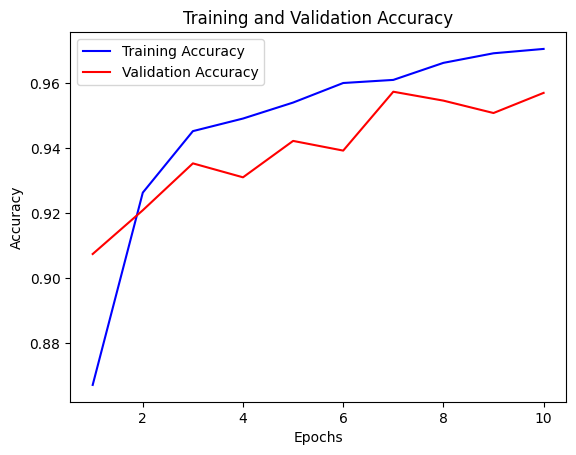

In [7]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing the model's history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1).numpy()
y_pred

array([8, 1, 9, ..., 3, 0, 9])

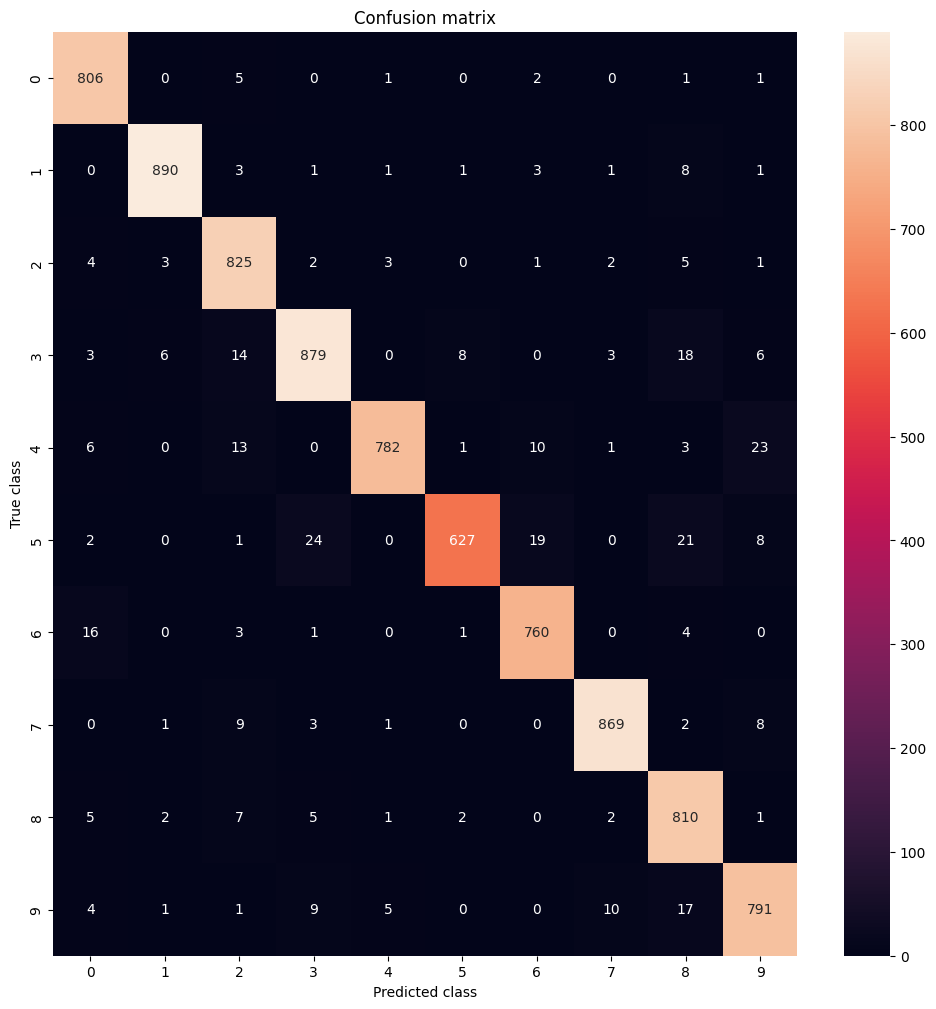

In [43]:
cm = confusion_matrix(y_test, pd.Series(y_pred))

import seaborn as sns

plt.figure(figsize =(12, 12))
sns.heatmap(cm,annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()